In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [31]:
def pontoFixo(funcao, xi, tolerancia): return opt.fixed_point(funcao, xi, maxiter=200, xtol = tolerancia)

In [32]:
def newtonRapson(f1, f2, xi, maxit): return opt.root_scalar(f1, fprime=f2, x0=xi, method='newton', maxiter=maxit)

In [33]:
def bissec(f, xl, xu, tolerancia, maxit): return opt.root_scalar(f,method='bisect',bracket=[xl,xu], rtol = tolerancia, maxiter=maxit)

In [34]:
def secant(f, xu, xl , maxit): return opt.root_scalar(f,method='secant',x0=xl, x1=xu, maxiter=maxit)

# 1.

### a)

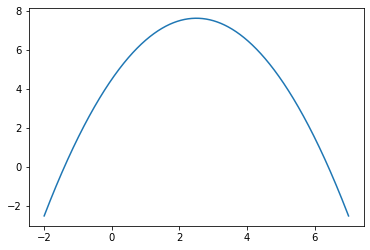

In [7]:
def f(x): return -0.5*x**2 + 2.5*x + 4.5

x = np.linspace(-2, 7, 1000)
plt.plot(x, f(x))

### b)

In [8]:
def raizes(a, b, c):
    D = (b**2 - 4*a*c)
    x1 = (-b + D**(1/2)) / (2*a)
    x2 = (-b - D**(1/2)) / (2*a)

    print('\nValor de x1: {0}'.format(x1))
    print('Valor de x2: {0}'.format(x2))
raizes(-0.5, 2.5, 4.5)


Valor de x1: -1.405124837953327
Valor de x2: 6.405124837953327


### c)

In [9]:
def bissecaoImplementacao(f,a,b,prec):
    x = 6.405124837953327
    m = (a+b)/2
    print('Raiz:', m)
    erro = (abs(x-m)/x)*100
    print("Erro:", "%.2f" % erro + '%')    
    print()
    if abs(b - a) < prec: return m
    if f(m) == 0: return m
    if f(m)*f(a) < 0: return bissecaoImplementacao(f,a,m,prec)
    else: return bissecaoImplementacao(f,m,b,prec)

In [10]:
print(bissecaoImplementacao(f, 5, 10, 1.5))

Raiz: 7.5
Erro: 17.09%

Raiz: 6.25
Erro: 2.42%

Raiz: 6.875
Erro: 7.34%

6.875


# 2.

In [11]:
def f(x):
    return -2*x**6 - 1.5*x**4 + 10*x + 20
def f1(x):
    return -12*x**5 - 6*x**3 + 10

In [12]:
bissec(f1, 0, 1, 0.05, 100)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 5
           root: 0.84375

# 3.

In [13]:
def falsaPosicao(f, xl, xu, stop ):
    
    it = 0
    
    while(True):
        
        xr = xu - ( f(xu)*(xl - xu)/ (f(xl) - f(xu)) )
        erro = abs( (xr-xu)/xr*100 )
        it += 1
        
        if erro <= stop or it == 200:
            break
        
        if (f(xl) * f(xr)) > 0:
            
            xl = xr

        else: 
            xu = xr
            
        
    return xr, it

# 4.

In [14]:
def f(x):
    return 2*np.sin(np.sqrt(x))-x

print('Raiz:',pontoFixo(f, 0.5, 0.001))

Raiz: 0.7686488567606196


# 5.

In [15]:
def f(x):
    return 2*x**3 - 11.7*x**2 + 17.7*x - 5

In [16]:
def f2(x):
    return 6*x**2 - 23.4*x + 17.7

### a)

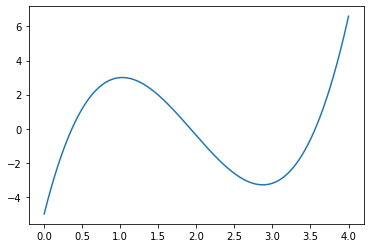

In [17]:
x = np.linspace(0, 4, 1000)
plt.plot(x, f(x))

### b)

In [18]:
print("Raiz:",pontoFixo(f, 3, 3))

Raiz: 3.161795407098121


### c)

In [19]:
newtonRapson(f, f2, 3, 3)

      converged: False
           flag: 'convergence error'
 function_calls: 6
     iterations: 3
           root: 3.7929344806432264

### d)

In [20]:
secant(f, 4, 3 , 3)

      converged: False
           flag: 'convergence error'
 function_calls: 5
     iterations: 3
           root: 3.5862753847117346

# 6.

### a)

In [52]:
def f(x):
    return 2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15

def df(x):
    return 8*x**3 + 12*x**2 + 6*x - 10

print("=========== Bisseção ===========\n", bissec(f, 0, 3, 10**-10, 200), '\n')

falsePosition = falsaPosicao(f, 0, 3, 200 )
print("=========== Falsa Posição ===========\nRaiz:", falsePosition[0], '\nInterações:', falsePosition[1])

print()
print("=========== Ponto Fixo ===========\nRaiz:", pontoFixo(f, 0, 10**-10), '\n')

print('===========  Newton-Raphson ===========')
print(newtonRapson(f, df, 0, 200), '\n')

print('=========== Secante ===========')
print(secant(f, 0, 3 , 200))

=========== Bisseção ===========
       converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 1.4928787086100783 

=========== Falsa Posição ===========
Raiz: 1.1129540940417413 
Interações: 7

=========== Ponto Fixo ===========
Raiz: -1.2164931649051722 

===========  Newton-Raphson ===========
      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: -1.3003841326439198 

=========== Secante ===========
      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: -1.3003841326439196


### b)